## Coronal Fuzziness
Compute fuzziness for some simulated images according to [Guarrasi et al. (2010)](https://ui.adsabs.harvard.edu/#abs/2010ApJ...719..576G).

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedFormatter,FixedLocator
import astropy.units as u
from sunpy.map import Map
import seaborn
from astropy.table import Table
from astropy.io import ascii

%matplotlib inline

In [3]:
!ls ../paper/data/high_frequency/

correlation_171_131.fits correlation_94_211.fits  timelag_211_131.fits
correlation_193_131.fits correlation_94_335.fits  timelag_211_171.fits
correlation_193_171.fits em_slope.fits            timelag_211_193.fits
correlation_211_131.fits loop_parameters.h5       timelag_335_131.fits
correlation_211_171.fits map_t001500_131.fits     timelag_335_171.fits
correlation_211_193.fits map_t001500_171.fits     timelag_335_193.fits
correlation_335_131.fits map_t001500_193.fits     timelag_335_211.fits
correlation_335_171.fits map_t001500_211.fits     timelag_94_131.fits
correlation_335_193.fits map_t001500_335.fits     timelag_94_171.fits
correlation_335_211.fits map_t001500_94.fits      timelag_94_193.fits
correlation_94_131.fits  timelag_171_131.fits     timelag_94_211.fits
correlation_94_171.fits  timelag_193_131.fits     timelag_94_335.fits
correlation_94_193.fits  timelag_193_171.fits


In [4]:
frequency = ['high','intermediate','low']
channels = [94,131,171,193,211,335]

In [11]:
foo = np.random.rand(10,10)
foo[np.where(foo>0.5)].size

54

In [8]:
np.prod(foo.shape)

100

In [32]:
fuzzy = {}
for f in frequency:
    fuzzy[f'{f}'] = []
    for c in channels:
        m = Map(f'../paper/data/{f}_frequency/map_t001500_{c}.fits')
        i_nz = np.where(m.data > 0)
        fuzzy[f'{f}'].append(
            np.sqrt(((m.data[i_nz] - m.data[i_nz].mean())**2).sum()/m.data[i_nz].size)/m.data[i_nz].mean()
        )

In [42]:
def fuzzy(m):
    return np.sqrt(((
        m.data[np.where(m.data > 0)] - m.data[np.where(m.data > 0)].mean())**2)
        .sum()/m.data[np.where(m.data > 0)].size
    )/m.data[np.where(m.data > 0)].mean()

In [44]:
tab = Table(
    {'Channel': channels, **{f: [fuzzy(Map(f'../paper/data/{f}_frequency/map_t001500_{c}.fits')) for c in channels] for f in frequency}}
)

In [49]:
formats = {'Channel': '%.0f', **{f: '%.2f' for f in frequency}}
ascii.write(tab, format='aastex', formats=formats)

\begin{deluxetable}{cccc}
\tablehead{\colhead{Channel} & \colhead{high} & \colhead{intermediate} & \colhead{low}}
\startdata
94 & 3.06 & 4.63 & 4.19 \\
131 & 5.56 & 3.61 & 6.13 \\
171 & 2.79 & 2.81 & 3.25 \\
193 & 2.69 & 2.80 & 2.79 \\
211 & 2.73 & 2.83 & 2.84 \\
335 & 2.63 & 3.08 & 3.21
\enddata
\end{deluxetable}


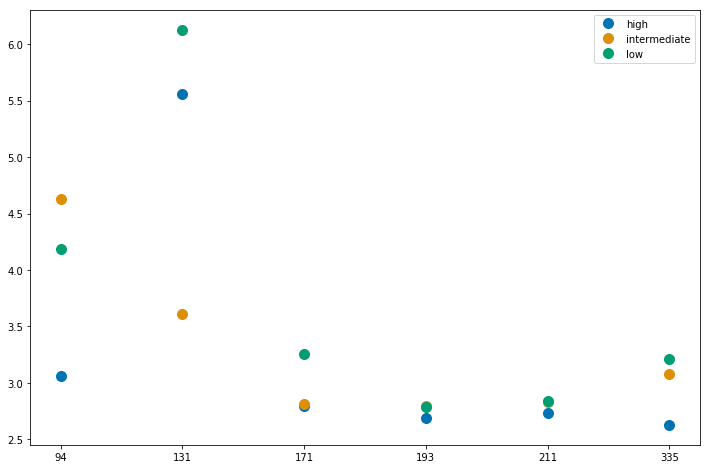

In [41]:
fig = plt.figure(figsize=(12,8));ax=fig.gca()
for j,f in enumerate(frequency):
    plt.plot(np.array(fuzzy[f'{f}']),
             color=seaborn.color_palette('colorblind')[j],
             ls='',markersize=10,label=frequency[j],marker='o')
ax.xaxis.set_major_locator(FixedLocator(range(len(channels))))
ax.xaxis.set_major_formatter(FixedFormatter([f'{c}' for c in channels]));
ax.legend()
#ax.set_yscale('log')

In [51]:
m.dimensions

PixelPair(x=<Quantity 543. pix>, y=<Quantity 519. pix>)

In [52]:
10**(5.6)

398107.1705534969

In [53]:
10**(7.1)

12589254.117941663